# Group Assignment Three
*By M. Nolan Gray*

In this notebook, I will conduct a preliminary housing profile of Los Angeles using US Census Data, specifically median gross rent and median home values.

First, I need to import the libraries I will likely use.

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

Next I will need to import my data.

In [2]:
mgr = gpd.read_file('Data/acs2019_5yr_B25064_14000US06037293306_MGR.geojson')
mv = gpd.read_file('Data/acs2019_5yr_B25077_14000US06037293306_MV.geojson')

I'm first going to check the data to make sure it's right and get a sense for what I'm working with.

In [3]:
print(mgr.shape)
print(mv.shape)

(1005, 5)
(1005, 5)


In [4]:
mgr.head()

,geoid,name,B25064001,"B25064001, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1737.0,121.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2198.0,628.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",1423.0,97.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1197.0,85.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",2371.0,207.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [5]:
mv.head()

,geoid,name,B25077001,"B25077001, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",474700.0,28357.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",622400.0,18650.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",435400.0,48749.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",471000.0,57244.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",609700.0,32400.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [6]:
mgr.tail()

,geoid,name,B25064001,"B25064001, Error",geometry
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",2300.0,180.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",1450.0,5.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


In [7]:
mv.tail()

,geoid,name,B25077001,"B25077001, Error",geometry
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",636900.0,2165.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


It looks like our friends at Census Reporter hid citywide medians at the end. Let's fix that.

In [8]:
mgr = mgr.drop([1004])
mv = mv.drop([1004])

Let's check out work.

In [9]:
mgr.tail()

,geoid,name,B25064001,"B25064001, Error",geometry
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",2333.0,1249.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",2300.0,180.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


In [10]:
mv.tail()

,geoid,name,B25077001,"B25077001, Error",geometry
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",841900.0,50519.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


No more citywide figure!

In [11]:
mgr.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1004 entries, 0 to 1003
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1004 non-null   object  
 1   name              1004 non-null   object  
 2   B25064001         986 non-null    float64 
 3   B25064001, Error  975 non-null    float64 
 4   geometry          1004 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 47.1+ KB


In [12]:
mv.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1004 entries, 0 to 1003
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1004 non-null   object  
 1   name              1004 non-null   object  
 2   B25077001         929 non-null    float64 
 3   B25077001, Error  906 non-null    float64 
 4   geometry          1004 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 47.1+ KB


Okay, so we know that there are 1,004 tracts, 986 have median gross rent data, and 929 have median home value data. 

Let's remove the unnecessary error columns...

In [13]:
ctk_mgr = ['geoid','name','B25064001','geometry']
mgr = mgr[ctk_mgr]
ctk_mv = ['geoid','name','B25077001','geometry']
mv = mv[ctk_mv]

...and name them something more intuitive.

In [14]:
mgr.columns = ['geoid','name','Median Gross Rent','geometry']
mv.columns = ['geoid','name','Median Value','geometry']

Let's pause to check and make sure it worked.

In [15]:
mgr.head()

,geoid,name,Median Gross Rent,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1737.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2198.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",1423.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1197.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",2371.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [16]:
mv.head()

,geoid,name,Median Value,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",474700.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",622400.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",435400.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",471000.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",609700.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


## Median Gross Rent
To start our analysis of median gross rents, let's get some descriptive statistics.

In [17]:
mgr['Median Gross Rent'].describe()

count     986.000000
mean     1589.549696
std       548.012976
min       292.000000
25%      1206.250000
50%      1407.500000
75%      1838.750000
max      3501.000000
Name: Median Gross Rent, dtype: float64

Alright, so this tells us a few things: the average median gross rent in a Los Angeles census tract is \\$1,589. The minimum is \\$292. The maximum is \\$3,501. Ouch! Let's plot it.

<AxesSubplot:ylabel='Frequency'>

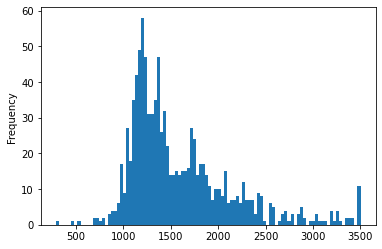

In [18]:
mgr['Median Gross Rent'].plot.hist(bins=100)

Interesting, so it's a right-skewed distribution, with a few *very* high-rent tracts.

Just out of morbid curiosity, I wonder what percentage of Angelenos pay roughly the same rent as me. Let's try a pie chart.

To find out, I first need to figure out (a) how many tracts have a higher median gross rent than my approximate rent, (b) how many tracts have a lower median gross rent than my approximate rent, and (c) how many tracts hav a median gross rent roughly the same as my rent.

I pay \\$1,600: to provide some buffer, anything over \\$1,700 will qualify as more, and anthing under \\$1,500 will qualify as less.

In [19]:
rent_list = mgr['Median Gross Rent'].tolist()
print(rent_list) #Checking to make sure I did this right!

[1737.0, 2198.0, 1423.0, 1197.0, 2371.0, 1335.0, 2216.0, 2547.0, 1590.0, 1259.0, 2375.0, 1406.0, 1218.0, 2438.0, 1695.0, 2019.0, 981.0, 1434.0, 1221.0, 1602.0, 1338.0, 1347.0, 2426.0, 1116.0, 1565.0, 1629.0, 1391.0, 1464.0, 1427.0, 1862.0, 1267.0, 1372.0, 1478.0, 1692.0, 1485.0, 1655.0, 2079.0, 1879.0, 2439.0, 1990.0, 2157.0, 1422.0, 2006.0, 1383.0, 1794.0, 1556.0, 1466.0, 2051.0, 1810.0, 3501.0, 1436.0, 2860.0, nan, 2361.0, 2898.0, 2229.0, 1233.0, 1698.0, 1623.0, 1820.0, 3118.0, 2977.0, 3501.0, 3253.0, 3415.0, 1888.0, 1229.0, 2240.0, 2597.0, 1742.0, 1548.0, 2868.0, 1463.0, 1190.0, 2404.0, 2178.0, 2093.0, 2291.0, 1775.0, 3183.0, 2271.0, 3501.0, 1585.0, 1711.0, 1482.0, 3025.0, 3501.0, 2101.0, 2167.0, 1657.0, 2375.0, 2870.0, 1373.0, 1378.0, 2153.0, 1911.0, 2423.0, nan, 1648.0, 2049.0, 1657.0, 1696.0, 1629.0, nan, 1720.0, 1647.0, 1626.0, 1679.0, 1874.0, 1460.0, 1364.0, 1323.0, 1444.0, 1523.0, 1762.0, 1232.0, nan, 2871.0, 1713.0, 1806.0, 2280.0, 1370.0, 1212.0, 1213.0, 1433.0, 1309.0, 1315

In [20]:
more_than_me = 0
for entry in rent_list:
    if entry > 1700:
        more_than_me = more_than_me + 1
    else:
        pass

print(more_than_me)

331


In [21]:
less_than_me = 0
for entry in rent_list:
    if entry < 1500:
        less_than_me = less_than_me + 1
    else:
        pass

print(less_than_me)

561


In [22]:
same_as_me = 0
for entry in rent_list:
    if (entry > 1499) and (entry < 1701):
        same_as_me = same_as_me + 1
    else:
        pass

print(same_as_me)

94


I'm sure to and advanced Python coder, this was a very ugly way of doing this. Alas, I am a newbie.

But we now know that: (a) 331 tracts have a median rent well above what I pay, (b) 561 tracts are below, and (c) 94 tracts pay roughly what I pay. 

As a check, I added them up, and they total 986, which is exactly the number of fields that have median gross rent data. Phew!

Alright, now let's make that pie chart and visualize that data.

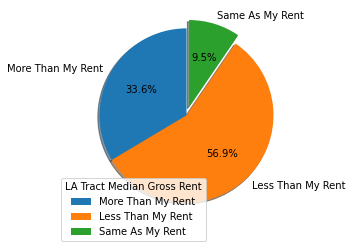

In [23]:
labels = ['More Than My Rent','Less Than My Rent','Same As My Rent']
sizes = [more_than_me,less_than_me,same_as_me]
explode = (0,0,0.1) # I want my chunk to stick out

fig1, rent = plt.subplots()
rent.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
rent.legend(loc = 'lower left',bbox_to_anchor = (-0.1,-0.1),title = "LA Tract Median Gross Rent") # I needed to get the legend out of the way of the dang chart!

plt.show()

Wow, maybe I should negotiate with my landlord. Or move...

Alright, no more fun and games. Let's make a choropleth map of median gross rents. 

<AxesSubplot:>

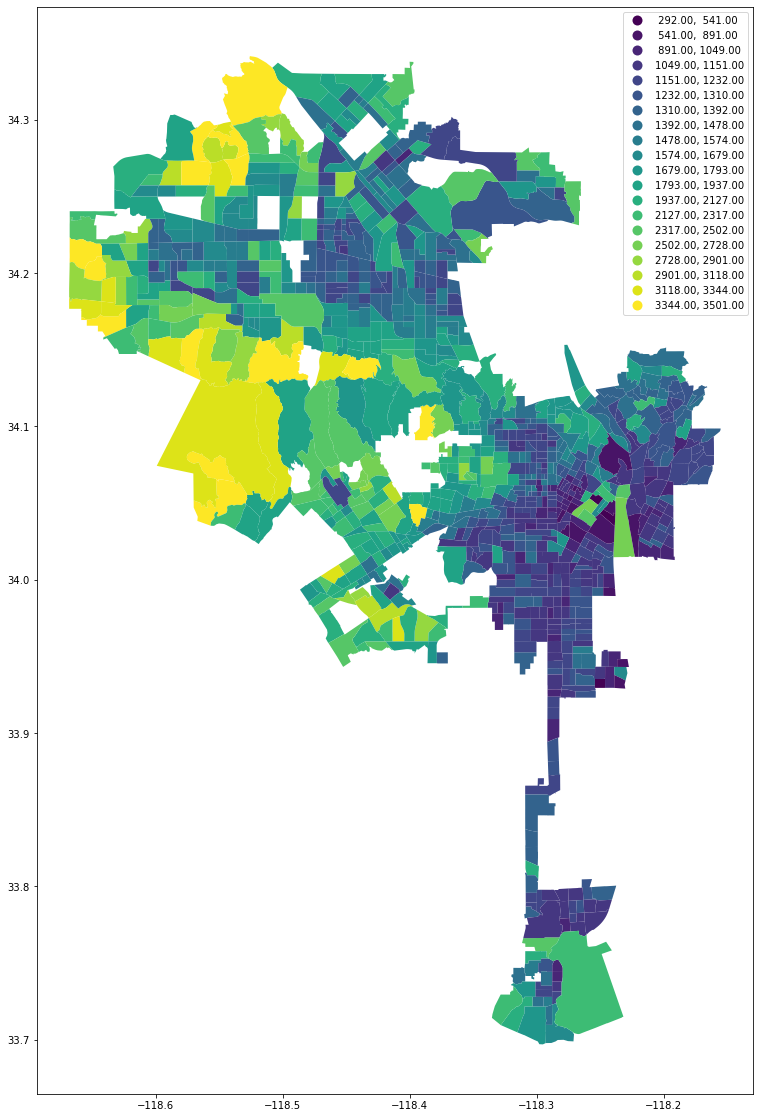

In [24]:
mgr.plot(figsize=(20,20), column = 'Median Gross Rent', legend = True, scheme = 'NaturalBreaks',k=20)

Alright, there are some clear -- and mostly expected -- spatial patterns here. But where are the extremes? Let's map the most and least expensive quartiles. 

Since these polygons won't cover the entire map, I'll want a basemap, which means I need to reproject the data.

In [25]:
mgr_wm = mgr.to_crs(epsg=3857)

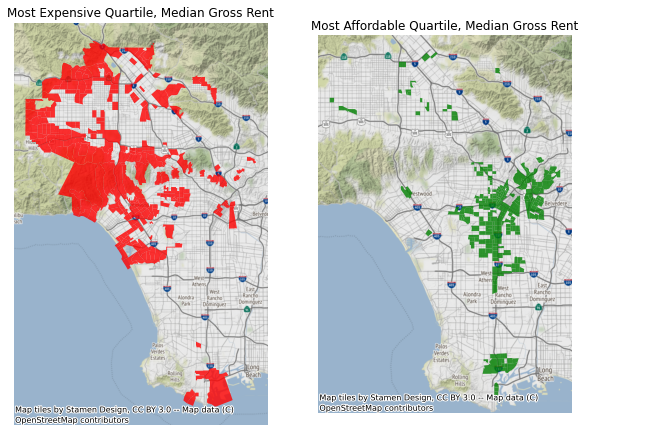

In [26]:
fix, axs = plt.subplots(1,2,figsize=(10,10))
ax1, ax2 = axs
mgr_wm[mgr_wm['Median Gross Rent']>1838].plot(ax=ax1,alpha=0.8,color="red")
ax1.axis('off')
ax1.set_title("Most Expensive Quartile, Median Gross Rent")
ctx.add_basemap(ax1)

mgr_wm[mgr_wm['Median Gross Rent']<1206].plot(ax=ax2,alpha=0.8,color="green")
ax2.axis('off')
ax2.set_title("Most Affordable Quartile, Median Gross Rent")
ctx.add_basemap(ax2)

Again, there are some pretty striking trends here: West and LA and outer portions of the Valley are the most expensive, South LA and neighborhoods surrounding downtown are the most affordable.

(Also: I wonder why they turned out different sizes? Is it based on the polygon distribution?)

## Median Home Values

Alrighty, let's turn to median home values. Let's start with some descriptive statistics.

In [27]:
mv['Median Value'].describe().apply(lambda x: format(x, 'f')) 
#Jupyter kept presenting the data in scientific notation -- hence the extra code!

count        929.000000
mean      690762.672766
std       363769.125843
min       247900.000000
25%       450700.000000
50%       584300.000000
75%       801800.000000
max      2000001.000000
Name: Median Value, dtype: object

Alrighty, so what does this tell us? The average median home value for a tract in Los Angeles is \\$690,763. The most expensive tract has a median home value of \\$2,000,001 and the most affordable tract has a median home value of \\$247,900. Maybe there's hope for me staying in Los Angeles yet... 

Let's do a histogram of median home values by tract.

<AxesSubplot:ylabel='Frequency'>

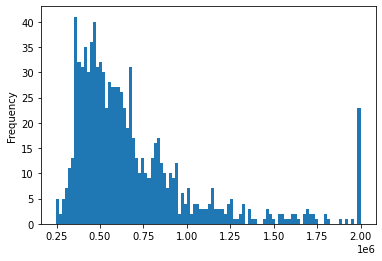

In [28]:
mv['Median Value'].plot.hist(bins=100)

Wow, a similar pattern pattern: a right skew with an extreme outlier. I wonder if that's Bel Air? Notably, there isn't nearly as much of a left tail as with median gross rents.

Let's skip all the silliness of comparing this data to me and map it.

<AxesSubplot:>

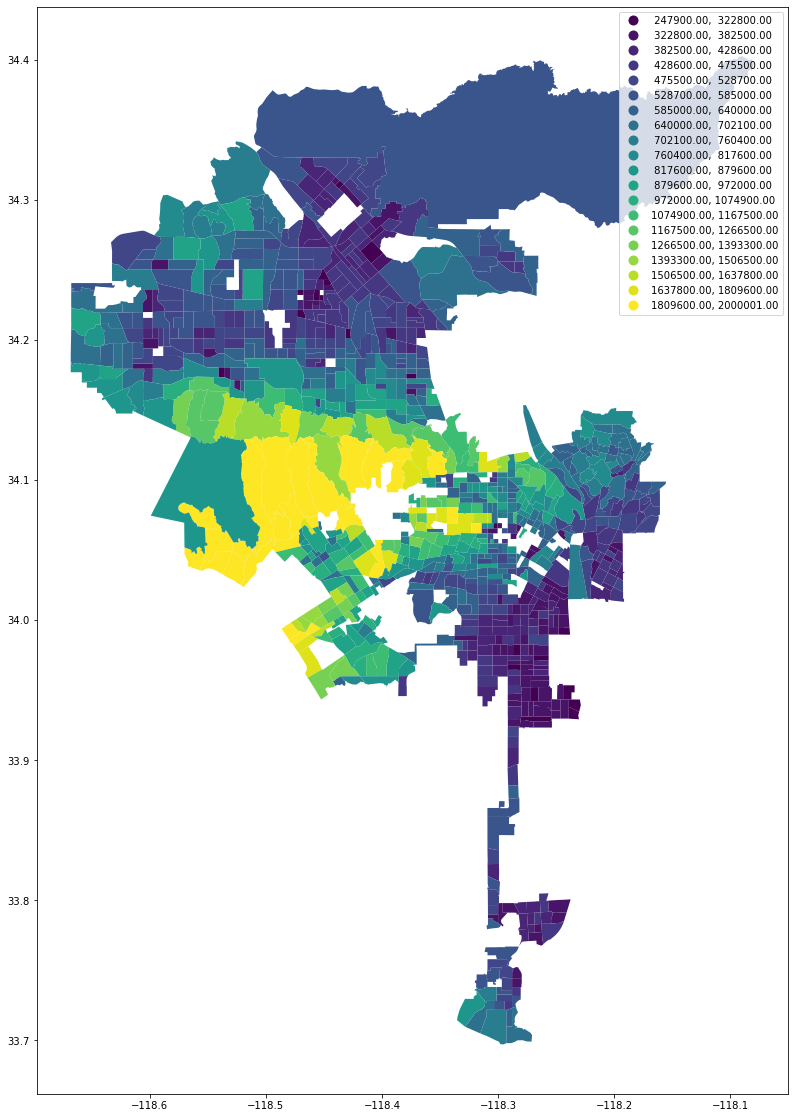

In [29]:
mv.plot(figsize=(20,20), column = 'Median Value', legend = True, scheme = 'NaturalBreaks',k=20)

The trends with median home values are broadly similar to median gross rent, but with a few exceptions: the outer Valley is much more affordable, while what looks like East Hollywood and Koreatown are much more expensive.

Also: what's with the new tract covering the Angeles National Forest? I checked and there are the same number of tracts in both, which could mean that a tract is missing...

In any case, let's proceed with mapping the extremes, as with median gross rent.

In [30]:
mv_wm = mv.to_crs(epsg=3857)

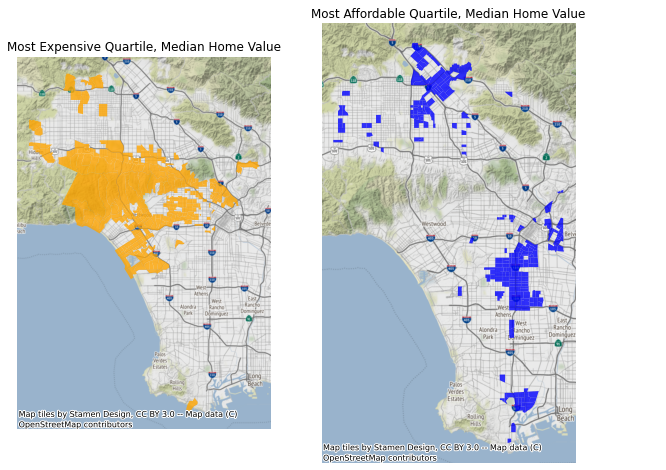

In [31]:
fix, axs = plt.subplots(1,2,figsize=(10,10))
ax1, ax2 = axs
mv_wm[mv_wm['Median Value']>801800].plot(ax=ax1,alpha=0.8,color="orange")
ax1.axis('off')
ax1.set_title("Most Expensive Quartile, Median Home Value")
ctx.add_basemap(ax1)

mv_wm[mv_wm['Median Value']<450700].plot(ax=ax2,alpha=0.8,color="blue")
ax2.axis('off')
ax2.set_title("Most Affordable Quartile, Median Home Value")
ctx.add_basemap(ax2)

At first blush, there are some striking differences from median gross rents: median home values are quite a bit higher east of downtown, and quite a bit lower up in the northern Valley, up around Sylmar.

## Conclusion

This exercise illustrates the geographic variation in median gross rents and median home values. Rents and home values broadly behave the same in Los Angeles, but with many conspicious exceptions. 

How do these trends inform observed patterns of street homelessness and the citing of of safe parking facilities? Hopefully, as my sophistication with Python improves, this is something we can explore.